In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



 34226176/170498071 [=====>........................] - ETA: 14s

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(test_images, test_labels))
history = model.fit(train_images, train_labels, epochs=5, 
                     validation_split = .2)

Epoch 1/5
1250/1250 [==============================] - 48s 15ms/step - loss: 1.4808 - accuracy: 0.4634 - val_loss: 1.2262 - val_accuracy: 0.5592
Epoch 2/5
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0106 - accuracy: 0.6431 - val_loss: 0.8804 - val_accuracy: 0.6951
Epoch 3/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8062 - accuracy: 0.7183 - val_loss: 0.8359 - val_accuracy: 0.7031
Epoch 4/5
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6753 - accuracy: 0.7655 - val_loss: 0.8191 - val_accuracy: 0.7223
Epoch 5/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5678 - accuracy: 0.8007 - val_loss: 0.7719 - val_accuracy: 0.7392


313/313 - 2s - loss: 0.7805 - accuracy: 0.7364 - 2s/epoch - 5ms/step
0.7804666757583618 0.7364000082015991


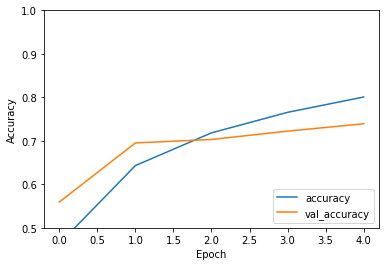

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

In [ ]:
predictions = model.predict(test_images)


In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix
predictions_new = np.argmax(predictions,axis=1)
confusion_matrix(test_labels,predictions_new)

array([[783,  16,  32,  22,  20,   5,   4,  10,  93,  15],
       [ 16, 875,   4,   3,   8,   7,   4,   7,  32,  44],
       [ 80,   7, 582,  43, 127,  63,  49,  25,  19,   5],
       [ 24,   7,  75, 552, 100, 151,  38,  29,  17,   7],
       [ 12,   2,  37,  45, 792,  22,  22,  50,  17,   1],
       [ 15,   2,  45, 169,  57, 646,   7,  44,  12,   3],
       [ 12,   5,  45,  59,  75,  26, 753,  10,  11,   4],
       [ 12,   3,  26,  35, 131,  48,   1, 739,   4,   1],
       [ 63,  19,   8,   9,   9,   4,   3,   6, 867,  12],
       [ 29,  91,   5,  18,  15,   6,   5,  16,  40, 775]])

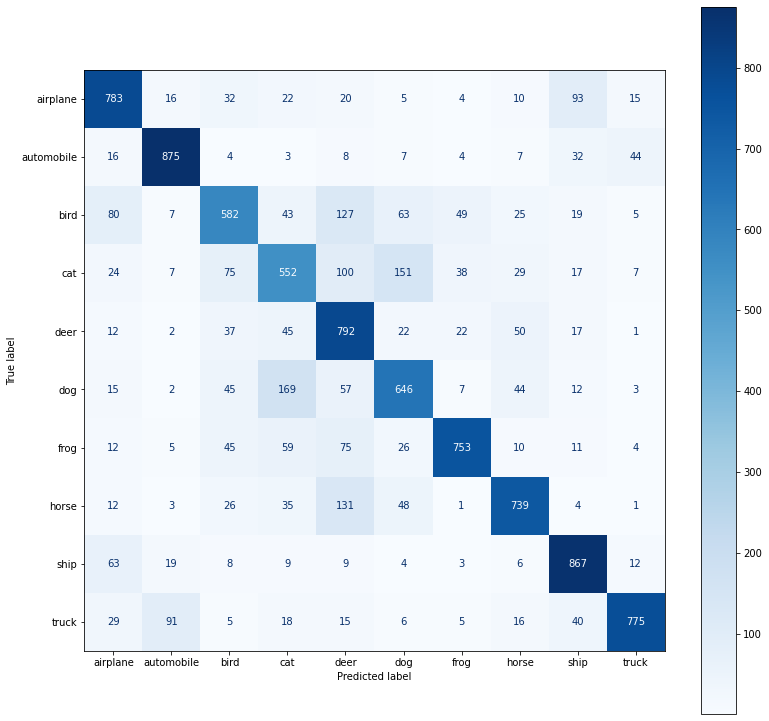

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, predictions_new)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(13,13)) # For changing the size of the plot
cmd.plot(ax=ax, cmap="Blues", values_format='.5g') # The .5g is for removing scientific notation in the confusion matrix

# plot_confusion_matrix(model, X_test, y_test, cmap='Blues')



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,predictions_new)) 

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1000
           1       0.85      0.88      0.86      1000
           2       0.68      0.58      0.63      1000
           3       0.58      0.55      0.56      1000
           4       0.59      0.79      0.68      1000
           5       0.66      0.65      0.65      1000
           6       0.85      0.75      0.80      1000
           7       0.79      0.74      0.76      1000
           8       0.78      0.87      0.82      1000
           9       0.89      0.78      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

